# Problem 1

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In case a final decision can be made, the tree is terminated by leaf nodes (also known as terminal nodes) that denote the action to be taken as the result of the series of decisions.

constructing decision trees by continuously partitioning data into smaller subsets and form a homogeneous groups called as non-parametric machine learning models.


ROOTNODE: most important feature in the dataset.

In [3]:
fc_data = pd.read_csv("Fraud_check.csv")
fc_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
# Creating Dummy Variables :
fc_data = pd.get_dummies(fc_data,columns=["Undergrad","Marital.Status","Urban"],drop_first=True)

In [5]:
# Creating new column "TaxInc" :
fc_data["TaxInc"] = pd.cut(fc_data["Taxable.Income"], bins=[10002,30000,99620], labels=["Risky","Good"])
fc_data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


In [6]:
fc_data = pd.get_dummies(fc_data,columns=["TaxInc"],drop_first=True)
fc_data.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


In [7]:
# Normalization Function :

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [8]:
fc_data_norm = norm_func(fc_data.iloc[:,:])
fc_data_norm.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.368405,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.194061,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.648869,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.834360,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.416901,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.740236,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.669122,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.416566,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.988540,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.965408,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [9]:
X = fc_data.iloc[:,1:7]
y = fc_data["TaxInc_Good"]

In [10]:
X

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,1,0,0,1
596,55369,2,1,0,0,1
597,154058,0,0,0,0,1
598,180083,17,1,1,0,0


In [11]:
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: TaxInc_Good, Length: 600, dtype: uint8

In [12]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [13]:
X_train

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
145,197422,2,0,0,0,1
9,155482,4,1,0,0,1
375,130935,2,0,1,0,0
523,42198,12,0,0,0,0
188,137569,10,0,0,0,0
...,...,...,...,...,...,...
71,105680,22,0,0,1,0
106,58535,20,1,0,1,1
270,130680,5,0,1,0,0
435,111774,4,0,0,0,1


In [14]:
y_train

145    1
9      1
375    1
523    1
188    0
      ..
71     1
106    0
270    1
435    1
102    1
Name: TaxInc_Good, Length: 480, dtype: uint8

In [15]:
# Building decision tree classifier using entropy criteria :

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

ENTROPY: It is the measure of randomness or disorder or impurity or confusion in the system. 

In [16]:
predict = model.predict(X_test)
pd.Series(predict).value_counts()

1    119
0      1
dtype: int64

In [17]:
y_test

110    0
419    1
565    1
77     1
181    0
      ..
399    1
340    1
148    1
494    1
439    0
Name: TaxInc_Good, Length: 120, dtype: uint8

In [18]:
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [19]:
pd.crosstab(y_test,predict)

col_0,0,1
TaxInc_Good,,
0,0,26
1,1,93


In [20]:
# Accuracy :
np.mean(predict == y_test)

0.775

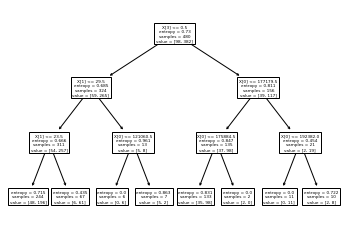

In [21]:
# Plotting Decision Tree :
from sklearn import tree

tree.plot_tree(model);

In [22]:
y_train.value_counts()

1    382
0     98
Name: TaxInc_Good, dtype: int64

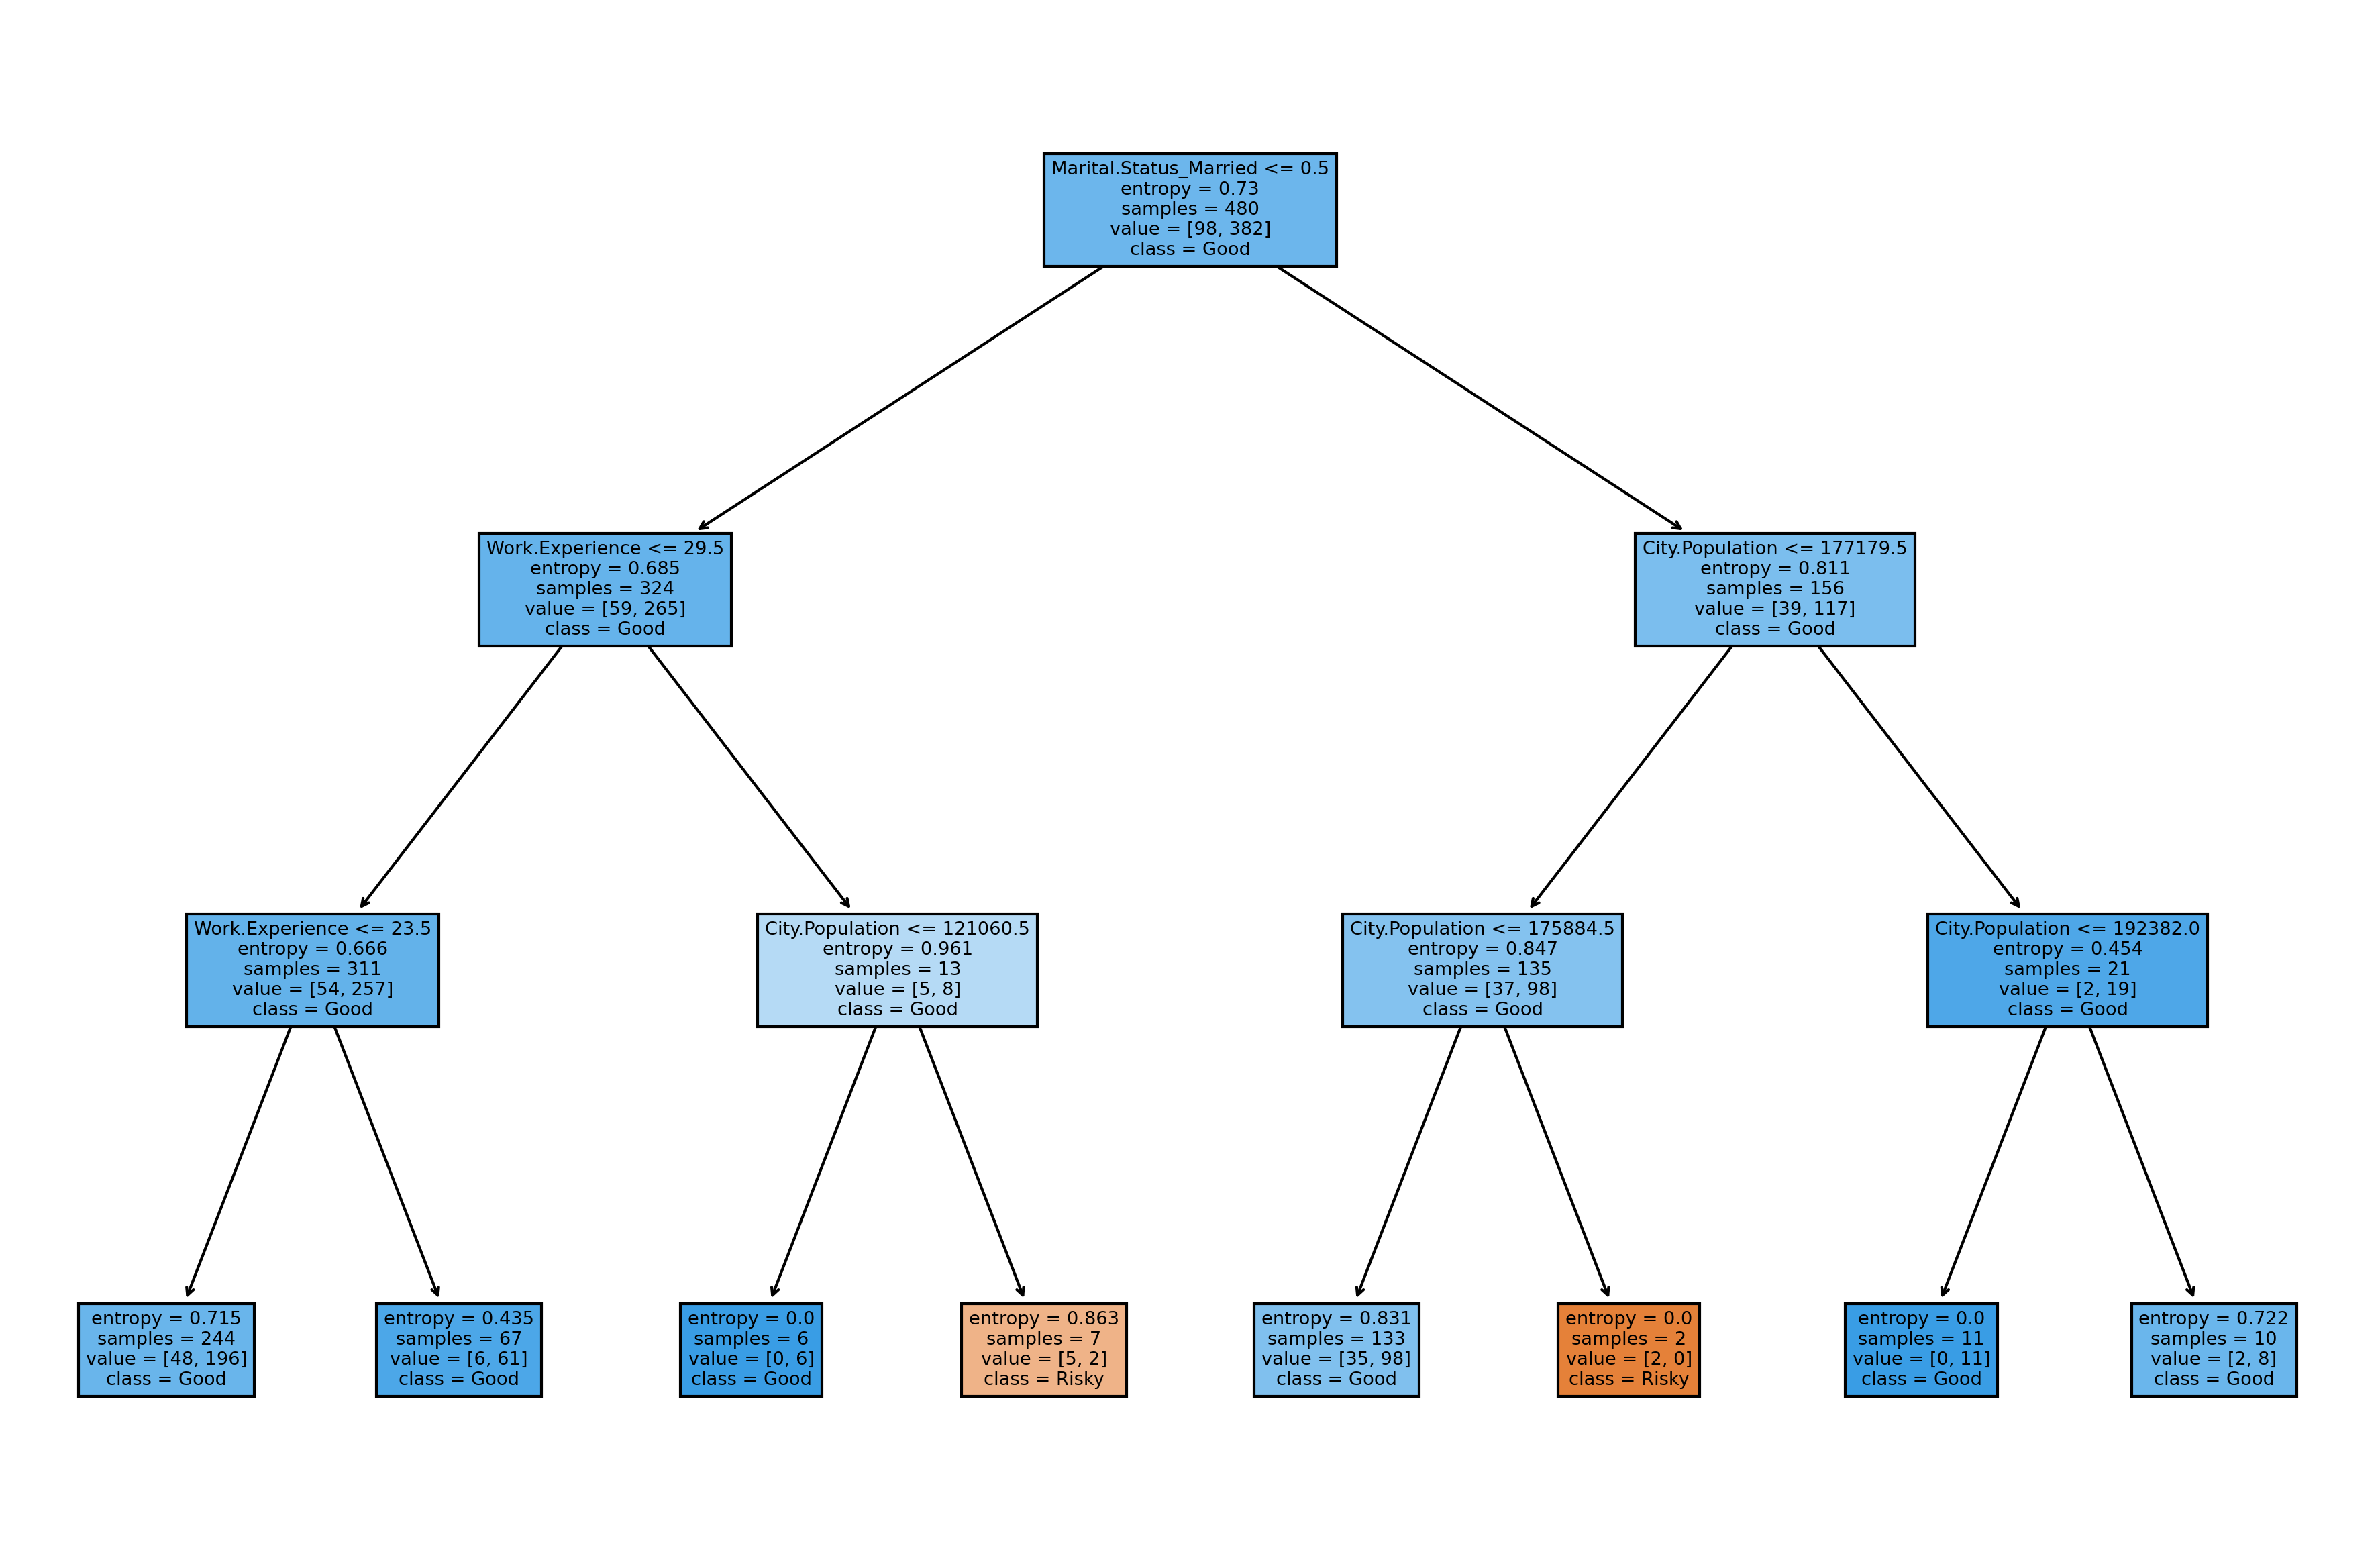

In [23]:
fn=["City.Population","Work.Experience","Undergrad_YES","Marital.Status_Married","Marital.Status_Single","Urban_Yes"]
cn=["Risky","Good"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

# Problem 2

Decision Tree
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
company_data = pd.read_csv("Company_Data.csv")
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [26]:
#Complete Company dataset :

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
company_data["ShelveLoc"]= label_encoder.fit_transform(company_data["ShelveLoc"])
company_data["Urban"]= label_encoder.fit_transform(company_data["Urban"])
company_data["US"]= label_encoder.fit_transform(company_data["US"])

In [27]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [28]:
# Creating Caterogical data on Sales Variable :

print("Length of Sales Variable : ",len(company_data["Sales"]))
print("Mean of Sales Variable : ",company_data["Sales"].mean())
company_data["Sales"].sort_values()

Length of Sales Variable :  400
Mean of Sales Variable :  7.496325


174     0.00
106     0.16
165     0.37
143     0.53
57      0.91
       ...  
18     13.91
367    14.37
25     14.90
316    15.63
376    16.27
Name: Sales, Length: 400, dtype: float64

In [29]:
company_data["highsales"] = np.where((company_data["Sales"] < 9),"Low","High")
company_data["highsales"]= label_encoder.fit_transform(company_data["highsales"])
company_data_new = company_data.iloc[:,1:]
company_data_new.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1


In [30]:
# Building Decision Tree Classifier :

In [31]:
# Decision Tree Classifier :
from sklearn.tree import DecisionTreeClassifier

In [34]:
array1 = company_data_new.values
x1 = array1[:,:-1]
y1 = array1[:,-1]

In [35]:
x1

array([[138,  73,  11, ...,  17,   1,   1],
       [111,  48,  16, ...,  10,   1,   1],
       [113,  35,  10, ...,  12,   1,   1],
       ...,
       [162,  26,  12, ...,  18,   1,   1],
       [100,  79,   7, ...,  12,   1,   1],
       [134,  37,   0, ...,  16,   1,   1]], dtype=int64)

In [36]:
y1

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,

In [41]:
from sklearn.model_selection import train_test_split

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.30)

In [42]:
model1 = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
model1.fit(x1_train,y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [44]:
#Predicting :
predict1 = model1.predict(x1_test)
pd.Series(predict1).value_counts()

1    111
0      9
dtype: int64

In [45]:
pd.crosstab(y1_test,predict1)

col_0,0,1
row_0,,
0,6,29
1,3,82


In [46]:
# Accuracy :
np.mean(predict1 == y1_test)

0.7333333333333333

In [47]:
# Feature Importance :
importance1 = model1.feature_importances_
importance1

array([0.19064162, 0.07959709, 0.23774371, 0.05201886, 0.31722966,
       0.12276907, 0.        , 0.        , 0.        , 0.        ])

<AxesSubplot:>

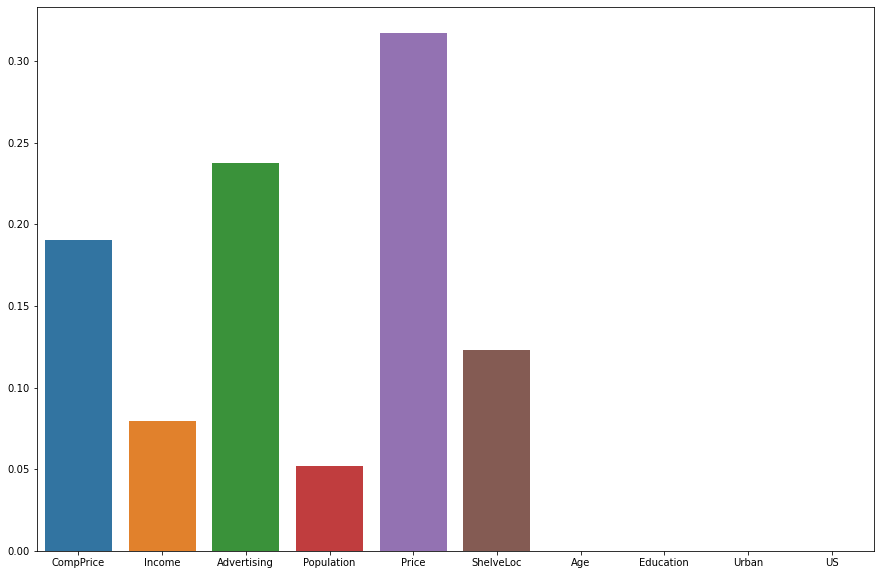

In [48]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.barplot(x=["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban","US"],y=model1.feature_importances_)